In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [237]:
df = pd.read_csv('COMBINED_DATA_ALL_YEARS.csv', low_memory=False)

In [238]:
# Create a table with null values sorted by percentage
null_counts = df.isnull().sum()
null_percent = (df.isnull().sum() / df.shape[0]) * 100

# Create a DataFrame for better display
null_table = pd.DataFrame({
    'Null Count': null_counts,
    'Null Percentage': null_percent.round(2)
})

# Sort by null percentage in descending order for better readability
null_table = null_table.sort_values('Null Percentage', ascending=False)

# Display the table
display(null_table)

,Null Count,Null Percentage
ER_VISIT,2131534,99.96
X_STAY,2130473,99.91
BIRTH_DEFECT,2130515,99.91
RPT_DATE,2128286,99.81
V_FUNDBY,2127785,99.78
CAGE_MO,2079969,97.54
DATEDIED,2074440,97.28
DIED,2069522,97.05
L_THREAT,2060071,96.61
DISABLE,2049803,96.13


In [239]:
## columns which are having more than 90 percent of the null values in the data frame
col_90_null = ['ER_VISIT', 'X_STAY', 'BIRTH_DEFECT', 'RPT_DATE', 'V_FUNDBY', 'CAGE_MO', 'DATEDIED', 'DIED', 'L_THREAT' ,'DISABLE', 'PRIOR_VAX']


## columns having more than 50% and less than 90 percent of the null values in the dataframe

col_50_90_null = ['HOSPDAYS', 'HOSPITAL', 'ER_ED_VISIT', 'OFC_VISIT', 'CUR_ILL', 'SPLTTYPE', 'SYMPTOMVERSION5', 'SYMPTOM5', 'LAB_DATA', 'ALLERGIES', 'SYMPTOM4',
'SYMPTOMVERSION4']

## columns having 20% to 50% null values
col_20_50_null = ['OTHER_MEDS', 'HISTORY', 'SYMPTOMVERSION3', 'SYMPTOM3', 'VAX_SITE', 'VAX_LOT', 'VAX_ROUTE', 'SYMPTOMVERSION2', 'SYMPTOM2', 'CAGE_YR']

## columns having 1% to 20% null values
col_1_20_null = ['STATE', 'NUMDAYS', 'AGE_YRS', 'RECOVD', 'ONSET_DATE', 'VAX_DATE', 'TODAYS_DATE', 'VAX_DOSE_SERIES', 'SYMPTOM_TEXT', 'SEX']

In [240]:
df.head(5)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOMVERSION5,ORDER_y,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER
0,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,22.1,2,FLU3,SANOFI PASTEUR,NaN,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),2
1,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,NaN,2,FLU3,SANOFI PASTEUR,NaN,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),2
2,855017,01/01/2020,HI,55.0,55.0,NaN,F,NaN,Symptoms occurred almost immediately- aching j...,NaN,...,NaN,1,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,NaN,2,SYR,LA,ZOSTER (SHINGRIX),1
3,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,22.1,1,UNK,UNKNOWN MANUFACTURER,NaN,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),1
4,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,22.1,1,UNK,UNKNOWN MANUFACTURER,NaN,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),1


In [241]:
## column view of the 90 percent null values in the table


col_90_null = [
    'ER_VISIT', 'X_STAY', 'BIRTH_DEFECT', 'RPT_DATE', 
    'V_FUNDBY', 'CAGE_MO', 'DATEDIED', 'DIED', 
    'L_THREAT', 'DISABLE', 'PRIOR_VAX'
]

# Select only those columns
null90_df = df[col_90_null]

null90_df

,ER_VISIT,X_STAY,BIRTH_DEFECT,RPT_DATE,V_FUNDBY,CAGE_MO,DATEDIED,DIED,L_THREAT,DISABLE,PRIOR_VAX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72; intense pain;12/7/18/Fluzone High-Dose/San...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72; intense pain;12/7/18/Fluzone High-Dose/San...
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2132426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2132427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2132428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2132429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
## column view of the 50-90 percent null values in the table


col_50_90_null = ['HOSPDAYS', 'HOSPITAL', 'ER_ED_VISIT', 'OFC_VISIT', 'CUR_ILL', 'SPLTTYPE', 'SYMPTOMVERSION5', 'SYMPTOM5', 'LAB_DATA', 'ALLERGIES', 'SYMPTOM4',
'SYMPTOMVERSION4']
# Select only those columns
null50_90_df = df[col_50_90_null]

null50_90_df

,HOSPDAYS,HOSPITAL,ER_ED_VISIT,OFC_VISIT,CUR_ILL,SPLTTYPE,SYMPTOMVERSION5,SYMPTOM5,LAB_DATA,ALLERGIES,SYMPTOM4,SYMPTOMVERSION4
0,NaN,NaN,NaN,NaN,None I was aware of,NaN,22.1,Insomnia,None. Did know know if the adverse events wer...,Latex,Heart rate increased,22.1
1,NaN,NaN,NaN,NaN,None I was aware of,NaN,NaN,NaN,None. Did know know if the adverse events wer...,Latex,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Morphine,Pyrexia,22.1
3,NaN,NaN,Y,Y,NaN,NaN,22.1,Injected limb mobility decreased,Same day 12/30/2019. No tests other than routi...,"Penicillin, sulfa drugs, erythromycin, tetracy...",Hypoaesthesia,22.1
4,NaN,NaN,Y,Y,NaN,NaN,22.1,Vertigo,Same day 12/30/2019. No tests other than routi...,"Penicillin, sulfa drugs, erythromycin, tetracy...",Tremor,22.1
...,...,...,...,...,...,...,...,...,...,...,...,...
2132426,NaN,NaN,NaN,NaN,NaN,"USNovavax, Inc2025NVXUS00",NaN,NaN,NaN,NaN,NaN,NaN
2132427,NaN,NaN,NaN,NaN,Allergy to chemicals NOS,"USNovavax, Inc2025NVXUS00",NaN,NaN,NaN,NaN,NaN,NaN
2132428,NaN,NaN,NaN,NaN,NaN,"USNovavax, Inc2025NVXUS00",NaN,NaN,NaN,NaN,NaN,NaN
2132429,NaN,NaN,NaN,NaN,NaN,USGSKUS2025AMR094015,28.0,Vaccination failure,NaN,NaN,Stress,28.0


In [243]:
## column view of the 20-50 percent null values in the table


col_20_50_null = ['OTHER_MEDS', 'HISTORY', 'SYMPTOMVERSION3', 'SYMPTOM3', 'VAX_SITE', 'VAX_LOT', 'VAX_ROUTE', 'SYMPTOMVERSION2', 'SYMPTOM2', 'CAGE_YR']

# Select only those columns
null20_50_df = df[col_20_50_null]

null20_50_df

,OTHER_MEDS,HISTORY,SYMPTOMVERSION3,SYMPTOM3,VAX_SITE,VAX_LOT,VAX_ROUTE,SYMPTOMVERSION2,SYMPTOM2,CAGE_YR
0,"Ovicite eye vitamins, vitamin D, vitamin C, Tu...",fibromyalgia; arthritis,22.1,Headache,NaN,NaN,NaN,22.1,Chills,73.0
1,"Ovicite eye vitamins, vitamin D, vitamin C, Tu...",fibromyalgia; arthritis,NaN,NaN,NaN,NaN,NaN,22.1,Pyrexia,73.0
2,Loristan,Migraines,22.1,Injection site pain,LA,NaN,SYR,22.1,Chills,55.0
3,"levothyroxine, multi vitamin, calcium.","Hypothyroidism, Meniere's Disease.",22.1,Hypertension,RA,NaN,IM,22.1,Fatigue,68.0
4,"levothyroxine, multi vitamin, calcium.","Hypothyroidism, Meniere's Disease.",22.1,Pyrexia,RA,NaN,IM,22.1,Pain in extremity,68.0
...,...,...,...,...,...,...,...,...,...,...
2132426,NaN,NaN,NaN,NaN,NaN,NaN,OT,28.0,Off label use,NaN
2132427,NaN,NaN,NaN,NaN,NaN,NaN,OT,28.0,Off label use,NaN
2132428,NaN,NaN,NaN,NaN,NaN,NaN,OT,28.0,Off label use,NaN
2132429,NaN,NaN,28.0,Oral herpes zoster,NaN,UNK,NaN,28.0,Malaise,NaN


In [244]:
## column view of the 1-20 percent null values in the table


col_1_20_null = ['STATE', 'NUMDAYS', 'AGE_YRS', 'RECOVD', 'ONSET_DATE', 'VAX_DATE', 'TODAYS_DATE', 'VAX_DOSE_SERIES', 'SYMPTOM_TEXT', 'SEX']
# Select only those columns
null1_20_df = df[col_1_20_null]

null1_20_df

,STATE,NUMDAYS,AGE_YRS,RECOVD,ONSET_DATE,VAX_DATE,TODAYS_DATE,VAX_DOSE_SERIES,SYMPTOM_TEXT,SEX
0,OH,0.0,73.0,U,12/30/2019,12/30/2019,01/01/2020,UNK,Extreme shivering for approx. 5 hours then fev...,F
1,OH,0.0,73.0,U,12/30/2019,12/30/2019,01/01/2020,UNK,Extreme shivering for approx. 5 hours then fev...,F
2,HI,0.0,55.0,N,12/30/2019,12/30/2019,01/01/2020,2,Symptoms occurred almost immediately- aching j...,F
3,WI,0.0,68.0,Y,12/30/2019,12/30/2019,01/01/2020,1,"Extreme pain, muscle weakness in right arm so ...",F
4,WI,0.0,68.0,Y,12/30/2019,12/30/2019,01/01/2020,1,"Extreme pain, muscle weakness in right arm so ...",F
...,...,...,...,...,...,...,...,...,...,...
2132426,NY,NaN,NaN,Y,NaN,NaN,07/24/2025,UNK,Daughter received the 2024-2025 Novavax vaccin...,F
2132427,NaN,0.0,NaN,Y,04/01/2025,04/01/2025,07/24/2025,UNK,"I got the one in the last batch in April, but ...",F
2132428,NY,NaN,NaN,Y,NaN,NaN,07/24/2025,UNK,"I got my last year only got the one dose, didn...",F
2132429,NaN,NaN,NaN,N,NaN,NaN,07/25/2025,UNK,Suspected vaccination failure; vertigo so bad ...,NaN


In [245]:
df.head().T

,0,1,2,3,4
VAERS_ID,810053,810053,855017,855018,855018
RECVDATE,01/01/2020,01/01/2020,01/01/2020,01/01/2020,01/01/2020
STATE,OH,OH,HI,WI,WI
AGE_YRS,73.0,73.0,55.0,68.0,68.0
CAGE_YR,73.0,73.0,55.0,68.0,68.0
CAGE_MO,NaN,NaN,NaN,NaN,NaN
SEX,F,F,F,F,F
RPT_DATE,NaN,NaN,NaN,NaN,NaN
SYMPTOM_TEXT,Extreme shivering for approx. 5 hours then fev...,Extreme shivering for approx. 5 hours then fev...,Symptoms occurred almost immediately- aching j...,"Extreme pain, muscle weakness in right arm so ...","Extreme pain, muscle weakness in right arm so ..."
DIED,NaN,NaN,NaN,NaN,NaN


In [246]:
df['ER_VISIT'].isnull().sum()

np.int64(2131534)

In [247]:
df.duplicated().sum()

np.int64(5218)

In [248]:

df_no_duplicates = df.drop_duplicates()
df = df.reset_index(drop=True)
df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOMVERSION5,ORDER_y,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER
0,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,22.1,2,FLU3,SANOFI PASTEUR,NaN,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),2
1,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,NaN,2,FLU3,SANOFI PASTEUR,NaN,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),2
2,855017,01/01/2020,HI,55.0,55.0,NaN,F,NaN,Symptoms occurred almost immediately- aching j...,NaN,...,NaN,1,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,NaN,2,SYR,LA,ZOSTER (SHINGRIX),1
3,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,22.1,1,UNK,UNKNOWN MANUFACTURER,NaN,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),1
4,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,22.1,1,UNK,UNKNOWN MANUFACTURER,NaN,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),1


In [249]:
df.duplicated().sum()

np.int64(5218)

In [250]:
new_df = df_no_duplicates

In [251]:
new_df.duplicated().sum()

np.int64(0)

In [252]:
new_df.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOMVERSION5,ORDER_y,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,ORDER
0,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,22.1,2,FLU3,SANOFI PASTEUR,NaN,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),2
1,810053,01/01/2020,OH,73.0,73.0,NaN,F,NaN,Extreme shivering for approx. 5 hours then fev...,NaN,...,NaN,2,FLU3,SANOFI PASTEUR,NaN,UNK,NaN,NaN,INFLUENZA (SEASONAL) (FLUZONE HIGH-DOSE),2
2,855017,01/01/2020,HI,55.0,55.0,NaN,F,NaN,Symptoms occurred almost immediately- aching j...,NaN,...,NaN,1,VARZOS,GLAXOSMITHKLINE BIOLOGICALS,NaN,2,SYR,LA,ZOSTER (SHINGRIX),1
3,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,22.1,1,UNK,UNKNOWN MANUFACTURER,NaN,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),1
4,855018,01/01/2020,WI,68.0,68.0,NaN,F,NaN,"Extreme pain, muscle weakness in right arm so ...",NaN,...,22.1,1,UNK,UNKNOWN MANUFACTURER,NaN,1,IM,RA,VACCINE NOT SPECIFIED (OTHER),1


In [253]:
new_df.shape

(2127213, 55)

In [254]:
## columns which are having more than 90 percent of the null values in the data frame
col_90_null = ['ER_VISIT', 'X_STAY', 'BIRTH_DEFECT', 'RPT_DATE', 'V_FUNDBY', 'CAGE_MO', 'DATEDIED', 'DIED', 'L_THREAT' ,'DISABLE', 'PRIOR_VAX']


## columns having more than 50% and less than 90 percent of the null values in the dataframe

col_50_90_null = ['HOSPDAYS', 'HOSPITAL', 'ER_ED_VISIT', 'OFC_VISIT', 'CUR_ILL', 'SPLTTYPE', 'SYMPTOMVERSION5', 'SYMPTOM5', 'LAB_DATA', 'ALLERGIES', 'SYMPTOM4',
'SYMPTOMVERSION4']

## columns having 20% to 50% null values
col_20_50_null = ['OTHER_MEDS', 'HISTORY', 'SYMPTOMVERSION3', 'SYMPTOM3', 'VAX_SITE', 'VAX_LOT', 'VAX_ROUTE', 'SYMPTOMVERSION2', 'SYMPTOM2', 'CAGE_YR']

## columns having 1% to 20% null values
col_1_20_null = ['STATE', 'NUMDAYS', 'AGE_YRS', 'RECOVD', 'ONSET_DATE', 'VAX_DATE', 'TODAYS_DATE', 'VAX_DOSE_SERIES', 'SYMPTOM_TEXT', 'SEX']

In [255]:
keep_cols = ['VAERS_ID',
'STATE',
'AGE_YR',
'SEX',
'SYMPTOM_TEXT',
'RECOVD',
'VAX_DATE',
'onset_DAYS',
'num_DAYS',
'V_ADMINBY',
'HISTORY_FORM_VERS_ALLERGIES_ORDER',
'ORDER',
'SYMPTOM_1',
'SYMPTOM_2',
'SYMPTOM_VERSION_2',
'SYMPTOM_3',
'SYMPTOM_VERSION_3',
'VAX_TYP',
'VAX_MANU',
'VAX_LOT',
'VAX_DOSE_SERIES',
'VAX_ROUTE',
'VAX_SITE',
'VAX_NAME'
]

In [256]:
len(keep_cols)

24

In [257]:
existing_cols= new_df.columns.tolist()

In [258]:
to_know = []

for i in existing_cols:
    if i not in keep_cols:
        to_know.append(i)
print(len(to_know))
print(to_know)

41
['RECVDATE', 'AGE_YRS', 'CAGE_YR', 'CAGE_MO', 'RPT_DATE', 'DIED', 'DATEDIED', 'L_THREAT', 'ER_VISIT', 'HOSPITAL', 'HOSPDAYS', 'X_STAY', 'DISABLE', 'ONSET_DATE', 'NUMDAYS', 'LAB_DATA', 'V_FUNDBY', 'OTHER_MEDS', 'CUR_ILL', 'HISTORY', 'PRIOR_VAX', 'SPLTTYPE', 'FORM_VERS', 'TODAYS_DATE', 'BIRTH_DEFECT', 'OFC_VISIT', 'ER_ED_VISIT', 'ALLERGIES', 'ORDER_x', 'SYMPTOM1', 'SYMPTOMVERSION1', 'SYMPTOM2', 'SYMPTOMVERSION2', 'SYMPTOM3', 'SYMPTOMVERSION3', 'SYMPTOM4', 'SYMPTOMVERSION4', 'SYMPTOM5', 'SYMPTOMVERSION5', 'ORDER_y', 'VAX_TYPE']


In [259]:
new_df.head().T

,0,1,2,3,4
VAERS_ID,810053,810053,855017,855018,855018
RECVDATE,01/01/2020,01/01/2020,01/01/2020,01/01/2020,01/01/2020
STATE,OH,OH,HI,WI,WI
AGE_YRS,73.0,73.0,55.0,68.0,68.0
CAGE_YR,73.0,73.0,55.0,68.0,68.0
CAGE_MO,NaN,NaN,NaN,NaN,NaN
SEX,F,F,F,F,F
RPT_DATE,NaN,NaN,NaN,NaN,NaN
SYMPTOM_TEXT,Extreme shivering for approx. 5 hours then fev...,Extreme shivering for approx. 5 hours then fev...,Symptoms occurred almost immediately- aching j...,"Extreme pain, muscle weakness in right arm so ...","Extreme pain, muscle weakness in right arm so ..."
DIED,NaN,NaN,NaN,NaN,NaN


In [260]:
cleaned_df = new_df[['VAERS_ID','STATE','AGE_YRS','SEX','SYMPTOM_TEXT','RECOVD','VAX_DATE','ONSET_DATE','NUMDAYS','V_ADMINBY',
'HISTORY','FORM_VERS','ALLERGIES','ORDER','ORDER','SYMPTOM1','SYMPTOMVERSION1','SYMPTOM2','SYMPTOMVERSION2','SYMPTOM3','SYMPTOMVERSION3','VAX_TYPE','VAX_MANU','VAX_LOT','VAX_DOSE_SERIES','VAX_ROUTE','VAX_SITE','VAX_NAME'
]]

In [261]:
cleaned_df.isnull().sum()

VAERS_ID                 0
STATE               290454
AGE_YRS             225228
SEX                   2591
SYMPTOM_TEXT          2685
RECOVD              224096
VAX_DATE            159783
ONSET_DATE          194989
NUMDAYS             288567
V_ADMINBY                0
HISTORY            1009385
FORM_VERS                0
ALLERGIES          1243977
ORDER                    0
ORDER                    0
SYMPTOM1                 0
SYMPTOMVERSION1          0
SYMPTOM2            482251
SYMPTOMVERSION2     482251
SYMPTOM3            886248
SYMPTOMVERSION3     886248
VAX_TYPE                 0
VAX_MANU                 0
VAX_LOT             596810
VAX_DOSE_SERIES      23362
VAX_ROUTE           568186
VAX_SITE            632236
VAX_NAME                 0
dtype: int64

In [262]:
cleaned_df['STATE'].isnull().sum()

np.int64(290454)

In [263]:
sample = cleaned_df['STATE'].unique().tolist()

In [264]:
print(sample)

['OH', 'HI', 'WI', nan, 'TX', 'FL', 'GA', 'MO', 'IN', 'OR', 'CA', 'IL', 'LA', 'VA', 'UT', 'NJ', 'ID', 'WA', 'NH', 'PA', 'NY', 'MI', 'CO', 'MN', 'AZ', 'KS', 'NC', 'TN', 'MT', 'WV', 'SC', 'MA', 'AR', 'MD', 'MS', 'NE', 'OK', 'CT', 'ME', 'KY', 'SD', 'NM', 'AL', 'RI', 'NV', 'IA', 'DE', 'ND', 'VT', 'WY', 'PR', 'AK', 'Ne', 'DC', 'GU', 'FM', 'Mi', 'Tx', 'VI', 'Fl', 'or', 'MH', 'Ar', 'PW', 'MP', 'Co', 'AS', 'XB', 'Ca', 'XL', 'XV', 'QM', 'QW']


In [265]:
print(len(sample))

73


In [266]:
# Create a dictionary to map incorrect state codes to their correct formats
state_corrections = {
    'Ne': 'NE',  # Nebraska
    'Mi': 'MI',  # Michigan
    'Tx': 'TX',  # Texas
    'Fl': 'FL',  # Florida
    'or': 'OR',  # Oregon
    'Ar': 'AR',  # Arkansas
    'Co': 'CO',  # Colorado
    'Ca': 'CA'   # California
}

# Apply the corrections using replace
cleaned_df['STATE'] = cleaned_df['STATE'].replace(state_corrections)



C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\173086773.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['STATE'] = cleaned_df['STATE'].replace(state_corrections)


In [267]:
states = cleaned_df['STATE'].unique().tolist()

In [268]:
print(states)

['OH', 'HI', 'WI', nan, 'TX', 'FL', 'GA', 'MO', 'IN', 'OR', 'CA', 'IL', 'LA', 'VA', 'UT', 'NJ', 'ID', 'WA', 'NH', 'PA', 'NY', 'MI', 'CO', 'MN', 'AZ', 'KS', 'NC', 'TN', 'MT', 'WV', 'SC', 'MA', 'AR', 'MD', 'MS', 'NE', 'OK', 'CT', 'ME', 'KY', 'SD', 'NM', 'AL', 'RI', 'NV', 'IA', 'DE', 'ND', 'VT', 'WY', 'PR', 'AK', 'DC', 'GU', 'FM', 'VI', 'MH', 'PW', 'MP', 'AS', 'XB', 'XL', 'XV', 'QM', 'QW']


In [269]:
cleaned_df.replace({'STATE': {'XB' :'TX', 'XL':'FL','XV': 'VA', 'QM': 'NM', 'QW': 'WA', 'QW': 'WI'}}, inplace=True)

C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\1689626119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.replace({'STATE': {'XB' :'TX', 'XL':'FL','XV': 'VA', 'QM': 'NM', 'QW': 'WA', 'QW': 'WI'}}, inplace=True)


In [270]:
cleaned_df['STATE'].unique()

array(['OH', 'HI', 'WI', nan, 'TX', 'FL', 'GA', 'MO', 'IN', 'OR', 'CA',
       'IL', 'LA', 'VA', 'UT', 'NJ', 'ID', 'WA', 'NH', 'PA', 'NY', 'MI',
       'CO', 'MN', 'AZ', 'KS', 'NC', 'TN', 'MT', 'WV', 'SC', 'MA', 'AR',
       'MD', 'MS', 'NE', 'OK', 'CT', 'ME', 'KY', 'SD', 'NM', 'AL', 'RI',
       'NV', 'IA', 'DE', 'ND', 'VT', 'WY', 'PR', 'AK', 'DC', 'GU', 'FM',
       'VI', 'MH', 'PW', 'MP', 'AS'], dtype=object)

In [271]:
cleaned_df.isnull().sum()

VAERS_ID                 0
STATE               290454
AGE_YRS             225228
SEX                   2591
SYMPTOM_TEXT          2685
RECOVD              224096
VAX_DATE            159783
ONSET_DATE          194989
NUMDAYS             288567
V_ADMINBY                0
HISTORY            1009385
FORM_VERS                0
ALLERGIES          1243977
ORDER                    0
ORDER                    0
SYMPTOM1                 0
SYMPTOMVERSION1          0
SYMPTOM2            482251
SYMPTOMVERSION2     482251
SYMPTOM3            886248
SYMPTOMVERSION3     886248
VAX_TYPE                 0
VAX_MANU                 0
VAX_LOT             596810
VAX_DOSE_SERIES      23362
VAX_ROUTE           568186
VAX_SITE            632236
VAX_NAME                 0
dtype: int64

In [272]:
df = cleaned_df

In [273]:
df['AGE_YRS'].isnull().sum()

np.int64(225228)

In [274]:
oneyear = df['AGE_YRS'] < 1.0

In [275]:
len(oneyear)

2127213

In [276]:
df['AGE_YRS']

0          73.0
1          73.0
2          55.0
3          68.0
4          68.0
           ... 
2132426     NaN
2132427     NaN
2132428     NaN
2132429     NaN
2132430     NaN
Name: AGE_YRS, Length: 2127213, dtype: float64

In [277]:
df['AGE_YRS']

0          73.0
1          73.0
2          55.0
3          68.0
4          68.0
           ... 
2132426     NaN
2132427     NaN
2132428     NaN
2132429     NaN
2132430     NaN
Name: AGE_YRS, Length: 2127213, dtype: float64

In [278]:
df['SEX'].unique()

array(['F', 'M', 'U', nan], dtype=object)

In [279]:
df['SEX'].isnull().sum()

np.int64(2591)

In [280]:
df['SEX'].fillna('U', inplace=True)

C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\2079413342.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SEX'].fillna('U', inplace=True)
C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\2079413342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEX'].fillna('U', inplace=True)


<BarContainer object of 3 artists>

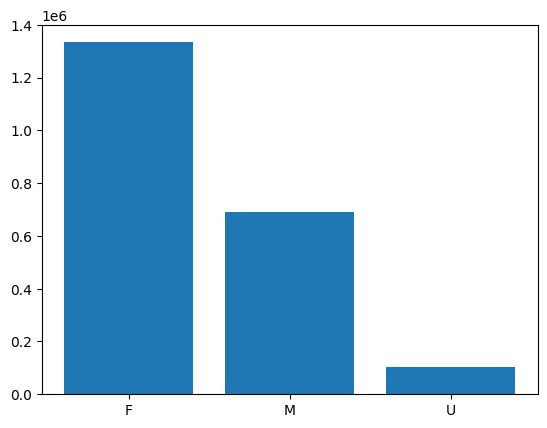

In [281]:
plt.bar(df['SEX'].value_counts().index, df['SEX'].value_counts().values)

In [282]:
df['SEX'].isnull().sum()

np.int64(0)

In [283]:
df.isnull().sum()

VAERS_ID                 0
STATE               290454
AGE_YRS             225228
SEX                      0
SYMPTOM_TEXT          2685
RECOVD              224096
VAX_DATE            159783
ONSET_DATE          194989
NUMDAYS             288567
V_ADMINBY                0
HISTORY            1009385
FORM_VERS                0
ALLERGIES          1243977
ORDER                    0
ORDER                    0
SYMPTOM1                 0
SYMPTOMVERSION1          0
SYMPTOM2            482251
SYMPTOMVERSION2     482251
SYMPTOM3            886248
SYMPTOMVERSION3     886248
VAX_TYPE                 0
VAX_MANU                 0
VAX_LOT             596810
VAX_DOSE_SERIES      23362
VAX_ROUTE           568186
VAX_SITE            632236
VAX_NAME                 0
dtype: int64

In [284]:
df.shape

(2127213, 28)

In [285]:
fuu = df['SYMPTOM_TEXT'].unique().tolist()

In [286]:
len(fuu)

1135046

In [287]:
df['RECOVD'].isnull().sum()

np.int64(224096)

In [288]:
df['RECOVD'].unique()

array(['U', 'N', 'Y', nan], dtype=object)

In [289]:
(df['RECOVD'] == 'U').sum()

np.int64(517279)

In [290]:
df.isnull().sum()   

VAERS_ID                 0
STATE               290454
AGE_YRS             225228
SEX                      0
SYMPTOM_TEXT          2685
RECOVD              224096
VAX_DATE            159783
ONSET_DATE          194989
NUMDAYS             288567
V_ADMINBY                0
HISTORY            1009385
FORM_VERS                0
ALLERGIES          1243977
ORDER                    0
ORDER                    0
SYMPTOM1                 0
SYMPTOMVERSION1          0
SYMPTOM2            482251
SYMPTOMVERSION2     482251
SYMPTOM3            886248
SYMPTOMVERSION3     886248
VAX_TYPE                 0
VAX_MANU                 0
VAX_LOT             596810
VAX_DOSE_SERIES      23362
VAX_ROUTE           568186
VAX_SITE            632236
VAX_NAME                 0
dtype: int64

In [291]:

x= 'VAX_SITE'
print(f"Missing values in {x}: {df[x].isnull().sum()}")
print(f"Unique values in {x}: {len(df[x].unique())}")

Missing values in VAX_SITE: 632236
Unique values in VAX_SITE: 12


In [292]:
print(len(df['ONSET_DATE'].unique()))

4170


In [293]:
# df.drop(axis=1, columns=['HISTORY'], inplace=True)
df.drop(axis=1,columns=['ALLERGIES'], inplace=True)

C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\972625442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(axis=1,columns=['ALLERGIES'], inplace=True)


In [294]:
df.isnull().sum()

VAERS_ID                 0
STATE               290454
AGE_YRS             225228
SEX                      0
SYMPTOM_TEXT          2685
RECOVD              224096
VAX_DATE            159783
ONSET_DATE          194989
NUMDAYS             288567
V_ADMINBY                0
HISTORY            1009385
FORM_VERS                0
ORDER                    0
ORDER                    0
SYMPTOM1                 0
SYMPTOMVERSION1          0
SYMPTOM2            482251
SYMPTOMVERSION2     482251
SYMPTOM3            886248
SYMPTOMVERSION3     886248
VAX_TYPE                 0
VAX_MANU                 0
VAX_LOT             596810
VAX_DOSE_SERIES      23362
VAX_ROUTE           568186
VAX_SITE            632236
VAX_NAME                 0
dtype: int64

In [295]:
df['AGE_YRS'].fillna(method='ffill', inplace=True)

C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\2728997483.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AGE_YRS'].fillna(method='ffill', inplace=True)
C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\2728997483.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['AGE_YRS'].fillna(method='ffill', inplace=True)
C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\2728997483.py:1: SettingWithCopyWarning: 
A value is trying to be se

In [296]:
k = pd.DataFrame(sample)

In [297]:
df['SYMPTOM_TEXT'].fillna(method='ffill', inplace=True)

C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\310637981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SYMPTOM_TEXT'].fillna(method='ffill', inplace=True)
C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\310637981.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['SYMPTOM_TEXT'].fillna(method='ffill', inplace=True)
C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\310637981.py:1: SettingWithCopyWarning: 
A value is trying t

In [298]:
df.head().T

,0,1,2,3,4
VAERS_ID,810053,810053,855017,855018,855018
STATE,OH,OH,HI,WI,WI
AGE_YRS,73.0,73.0,55.0,68.0,68.0
SEX,F,F,F,F,F
SYMPTOM_TEXT,Extreme shivering for approx. 5 hours then fev...,Extreme shivering for approx. 5 hours then fev...,Symptoms occurred almost immediately- aching j...,"Extreme pain, muscle weakness in right arm so ...","Extreme pain, muscle weakness in right arm so ..."
RECOVD,U,U,N,Y,Y
VAX_DATE,12/30/2019,12/30/2019,12/30/2019,12/30/2019,12/30/2019
ONSET_DATE,12/30/2019,12/30/2019,12/30/2019,12/30/2019,12/30/2019
NUMDAYS,0.0,0.0,0.0,0.0,0.0
V_ADMINBY,PVT,PVT,MIL,PHM,PHM


<Axes: >

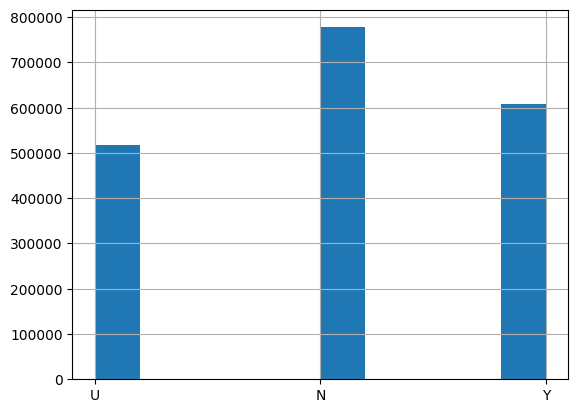

In [299]:
df['RECOVD'].hist()

In [300]:
df['RECOVD'].ffill(inplace=True)

C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\2971263938.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RECOVD'].ffill(inplace=True)
C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\2971263938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RECOVD'].ffill(inplace=True)


In [301]:
df['RECOVD'].isnull().sum()

np.int64(0)

In [302]:
df['RECOVD'].fillna('U', inplace=True)

C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\3580059116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RECOVD'].fillna('U', inplace=True)


<Axes: >

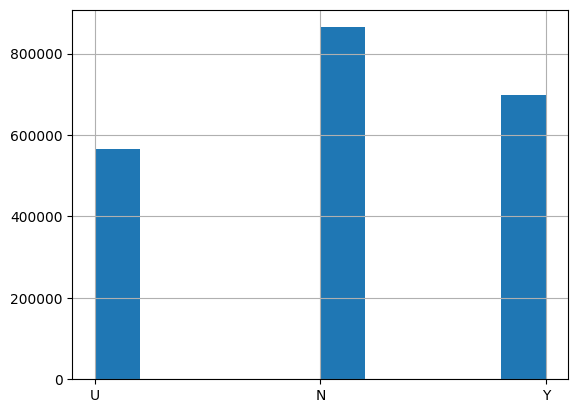

In [303]:
df['RECOVD'].hist()

In [304]:
df.isnull().sum()

VAERS_ID                 0
STATE               290454
AGE_YRS                  0
SEX                      0
SYMPTOM_TEXT             0
RECOVD                   0
VAX_DATE            159783
ONSET_DATE          194989
NUMDAYS             288567
V_ADMINBY                0
HISTORY            1009385
FORM_VERS                0
ORDER                    0
ORDER                    0
SYMPTOM1                 0
SYMPTOMVERSION1          0
SYMPTOM2            482251
SYMPTOMVERSION2     482251
SYMPTOM3            886248
SYMPTOMVERSION3     886248
VAX_TYPE                 0
VAX_MANU                 0
VAX_LOT             596810
VAX_DOSE_SERIES      23362
VAX_ROUTE           568186
VAX_SITE            632236
VAX_NAME                 0
dtype: int64

In [305]:
df['STATE'].fillna("Unknown", inplace=True)

C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\2665130379.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['STATE'].fillna("Unknown", inplace=True)
C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\2665130379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATE'].fillna("Unknown", inplace=True)


In [306]:
df.isnull().sum()

VAERS_ID                 0
STATE                    0
AGE_YRS                  0
SEX                      0
SYMPTOM_TEXT             0
RECOVD                   0
VAX_DATE            159783
ONSET_DATE          194989
NUMDAYS             288567
V_ADMINBY                0
HISTORY            1009385
FORM_VERS                0
ORDER                    0
ORDER                    0
SYMPTOM1                 0
SYMPTOMVERSION1          0
SYMPTOM2            482251
SYMPTOMVERSION2     482251
SYMPTOM3            886248
SYMPTOMVERSION3     886248
VAX_TYPE                 0
VAX_MANU                 0
VAX_LOT             596810
VAX_DOSE_SERIES      23362
VAX_ROUTE           568186
VAX_SITE            632236
VAX_NAME                 0
dtype: int64

In [307]:
df.isnull().sum()

VAERS_ID                 0
STATE                    0
AGE_YRS                  0
SEX                      0
SYMPTOM_TEXT             0
RECOVD                   0
VAX_DATE            159783
ONSET_DATE          194989
NUMDAYS             288567
V_ADMINBY                0
HISTORY            1009385
FORM_VERS                0
ORDER                    0
ORDER                    0
SYMPTOM1                 0
SYMPTOMVERSION1          0
SYMPTOM2            482251
SYMPTOMVERSION2     482251
SYMPTOM3            886248
SYMPTOMVERSION3     886248
VAX_TYPE                 0
VAX_MANU                 0
VAX_LOT             596810
VAX_DOSE_SERIES      23362
VAX_ROUTE           568186
VAX_SITE            632236
VAX_NAME                 0
dtype: int64

In [308]:
df.head().T

,0,1,2,3,4
VAERS_ID,810053,810053,855017,855018,855018
STATE,OH,OH,HI,WI,WI
AGE_YRS,73.0,73.0,55.0,68.0,68.0
SEX,F,F,F,F,F
SYMPTOM_TEXT,Extreme shivering for approx. 5 hours then fev...,Extreme shivering for approx. 5 hours then fev...,Symptoms occurred almost immediately- aching j...,"Extreme pain, muscle weakness in right arm so ...","Extreme pain, muscle weakness in right arm so ..."
RECOVD,U,U,N,Y,Y
VAX_DATE,12/30/2019,12/30/2019,12/30/2019,12/30/2019,12/30/2019
ONSET_DATE,12/30/2019,12/30/2019,12/30/2019,12/30/2019,12/30/2019
NUMDAYS,0.0,0.0,0.0,0.0,0.0
V_ADMINBY,PVT,PVT,MIL,PHM,PHM


In [309]:
df.tail()

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,RECOVD,VAX_DATE,ONSET_DATE,NUMDAYS,V_ADMINBY,...,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
2132426,2851120,NY,93.0,F,Daughter received the 2024-2025 Novavax vaccin...,Y,NaN,NaN,NaN,UNK,...,28.0,NaN,NaN,COVID19,NOVAVAX,NaN,UNK,OT,NaN,COVID19 (COVID19 (NOVAVAX))
2132427,2851121,Unknown,93.0,F,"I got the one in the last batch in April, but ...",Y,04/01/2025,04/01/2025,0.0,UNK,...,28.0,NaN,NaN,COVID19,NOVAVAX,NaN,UNK,OT,NaN,COVID19 (COVID19 (NOVAVAX))
2132428,2851122,NY,93.0,F,"I got my last year only got the one dose, didn...",Y,NaN,NaN,NaN,UNK,...,28.0,NaN,NaN,COVID19,NOVAVAX,NaN,UNK,OT,NaN,COVID19 (COVID19 (NOVAVAX))
2132429,2851140,Unknown,93.0,U,Suspected vaccination failure; vertigo so bad ...,N,NaN,NaN,NaN,UNK,...,28.0,Oral herpes zoster,28.0,VARZOS,UNKNOWN MANUFACTURER,UNK,UNK,NaN,NaN,ZOSTER (NO BRAND NAME)
2132430,2851140,Unknown,93.0,U,Suspected vaccination failure; vertigo so bad ...,N,NaN,NaN,NaN,UNK,...,NaN,NaN,NaN,VARZOS,UNKNOWN MANUFACTURER,UNK,UNK,NaN,NaN,ZOSTER (NO BRAND NAME)


In [310]:
df['NUMDAYS'].tail()

2132426    NaN
2132427    0.0
2132428    NaN
2132429    NaN
2132430    NaN
Name: NUMDAYS, dtype: float64

In [311]:
df['SYMPTOM_TEXT'][0]

"Extreme shivering for approx. 5 hours then fever of 100.5.  Excruciating pain over entire body with movement.  Headache.  Rapid heartbeat lasting all night.  Inability to sleep.  Symptoms reduced by next morning (10am); weakness; headache.  Pain gone by 1/1/20.  Second time I've experienced this.  Had milder reaction in 2018 but had also two flu shots in less than 6 months.  (Not sure why that occurred.  PA suggested it in July; I forgot and got one at Pharmacy.  When I had such a violent reaction, I looked through my paperwork and found the flu shot listed with other shots I had at the same time.  Assumed the violent reaction to the December, 2018, flu shot was because I had a previous one less than 6 mos. earlier.  This year the reaction was similar but more intense.)"

In [312]:
df.drop(columns=['HISTORY'], inplace=True)

C:\Users\saiki\AppData\Local\Temp\ipykernel_8628\3560823338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['HISTORY'], inplace=True)


In [313]:
df.isnull().sum()

VAERS_ID                0
STATE                   0
AGE_YRS                 0
SEX                     0
SYMPTOM_TEXT            0
RECOVD                  0
VAX_DATE           159783
ONSET_DATE         194989
NUMDAYS            288567
V_ADMINBY               0
FORM_VERS               0
ORDER                   0
ORDER                   0
SYMPTOM1                0
SYMPTOMVERSION1         0
SYMPTOM2           482251
SYMPTOMVERSION2    482251
SYMPTOM3           886248
SYMPTOMVERSION3    886248
VAX_TYPE                0
VAX_MANU                0
VAX_LOT            596810
VAX_DOSE_SERIES     23362
VAX_ROUTE          568186
VAX_SITE           632236
VAX_NAME                0
dtype: int64

In [314]:
df.isnull().sum()

VAERS_ID                0
STATE                   0
AGE_YRS                 0
SEX                     0
SYMPTOM_TEXT            0
RECOVD                  0
VAX_DATE           159783
ONSET_DATE         194989
NUMDAYS            288567
V_ADMINBY               0
FORM_VERS               0
ORDER                   0
ORDER                   0
SYMPTOM1                0
SYMPTOMVERSION1         0
SYMPTOM2           482251
SYMPTOMVERSION2    482251
SYMPTOM3           886248
SYMPTOMVERSION3    886248
VAX_TYPE                0
VAX_MANU                0
VAX_LOT            596810
VAX_DOSE_SERIES     23362
VAX_ROUTE          568186
VAX_SITE           632236
VAX_NAME                0
dtype: int64

<Axes: xlabel='None', ylabel='NUMDAYS'>

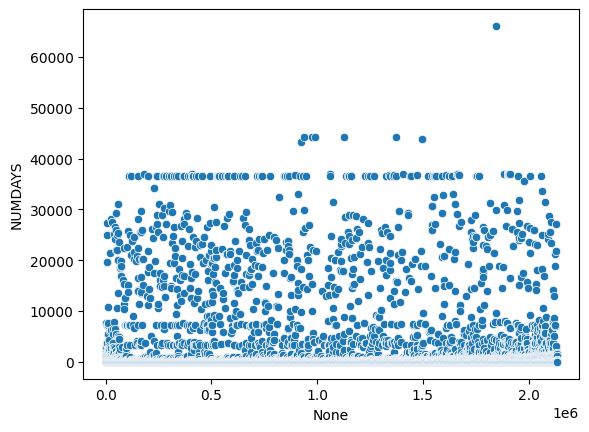

In [317]:
import seaborn as sns
sns.scatterplot(data=df, x=df.index, y='NUMDAYS')